# Intro to Geospatial Data using Python

## Disclaimer
* Not a GIS expert, just someone with the drive to self learn.
* Going to be talking mostly about Shape (.shp) files but other formats exist (geojson, raster, etc)
* Using Python 3.5, no guarantees everything works on 2.7

## Background
* What is GeoSpatial Data?
* Types of GeoSpatial Data
* What kinds of GeoSpatial Data is available?
* Where to get data?

## Technical
* Getting Set Up
* Reading in Data
* Exploring Data
    * Fields
    * Profiling
    * Visualization
* Filtering
    * Data Attributes
    * Geodesic Features
* Geodesic transformations
    * Units of Measure
    * Projections
* Geodesic Calculations
    * Centroid
    * Distance between points
* Joins/merges
    * Joining tabular data
    * Joining on geodesic features
* Creating new data
    * New Fields
    * New Shapes
* Writing Data

## What is GeoSpatial Data?
The word geospatial is used to indicate that data that has a geographic component to it.  This means that the records in a dataset have locational information tied to them such as geographic data in the form of coordinates, address, city, or ZIP code. GIS data is a form of geospatial data.  Other geospatial data can originate from GPS data, satellite imagery, and geotagging. [1]

![](./img/gislayers.jpg)

[1]: https://www.gislounge.com/difference-gis-geospatial/

## Types of Geospatial Data

## Vector/Polygon Data
* A representation of the world using points, lines, and polygons. 
* Vector models are useful for storing data that has discrete boundaries, such as country borders, land parcels, and streets.
* Common formats are Shape Files, GeoJSON, KML (Keyhole Markup Language)
* Often used by data scientists to calculate additional variables (distance to water in this example) or weight attributes based on area/density.
![](./img/GIS_Shape.jpg)

## Raster Data
* Rasters are digital aerial photographs, imagery from satellites, digital pictures, or even scanned maps
* Common formats are .JPG, .TIF, .GIF or similar format
* Can help answer fuzzy questions like "how many fields were planted in county X vs left fallow?" 
    * This ends up being an image recognition type problem as you are trying to planted vs fallow by coloration.
![](./img/GIS_Raster.jpg)

## Tablular Files
* Numeric data is statistical data which includes a geographical component 
* Joined with vector files so the data can be queried and displayed as a layer on a map in a GIS. 
* The most common type of numeric data is demographic data from the US Census.
* Unique Identifiers (Hydrology Number, State, Metropolitan Statistical Area ID, Lat/Long, etc)
* Typically what most data scientists & statisticians work with, columns of attributes/characteristics that describe an customer/town/entity
![](./img/GIS_tabular.jpg)

## What kinds of GeoSpatial Data is available?
![](./img/GIS_Categories.PNG)
### Government
* Local (MetCouncil, Minneapolis School District)
* State (DNR, MN PCA, Hennepin County)
* Federal (Census Bureau, NASA)

### Private
* Energy (Xcel Engery, Centerpoint, etc)
* Technology (Google, Uber, etc)

## Where can I get Minnesota Geospatial Data?
[![MN GeoSpatial Commons](./img/mn_geospatial.PNG)](https://gisdata.mn.gov/)

# Getting Set Up

## Start with Anaconda 3.5
Anaconda is the de facto industry standard for Python Scientific Computing. Without it users are left to manage dependencies, find and compile low level C libraries and generally in for a huge headache. Added bonus is that you don't need administrator privledges to install if you install only for the local user.

### Download Here
[![Download Here](./img/Anaconda_Download.PNG)](https://www.continuum.io/downloads)

![conda-forge](./img/Conda_Forge.PNG)

## Install Additional Libraries

Conda is a packaging tool and installer that aims to do more than what pip does; handle library dependencies outside of the Python packages as well as the Python packages themselves.

## What is Conda Forge?

conda-forge is a github organization containing repositories of conda recipes. Each repository automatically builds its own recipe in a clean and repeatable way on Windows, Linux and OSX. 

Extremely valuable as you don't have to find and compile dependencies (which isn't fun on Linux/OSX and is a *NIGHTMARE* on Windows).

**Enable conda-forge repositories by running following line in Terminal/CMD/Shell of your choice.**

`conda config --add channels conda-forge`

## Python Geospatial Libraries Covered in Notebook

* [geopandas][] - Working with spatial data is fun again!
* [shapely][] - For geometry handling
* [rtree][] - For efficiently querying spatial data
* [pyshp][] - For reading and writing shapefiles (in _pure_ Python)
* [pyproj][] - For conversions between projections
* [fiona][] - For making it _easy_ to read/write geospatial data formats
* [ogr/gdal][] - For reading, writing, and transforming geospatial data formats
* [geopy][] - For geolocating and things like that
* [pysal][] -  Spatial econometrics, exploratory spatial and spatio-temporal data analysis, spatial clustering (and more)
* [descartes][] - For plotting geometries in matplotlib

[pandas]: http://pandas.pydata.org/
[geopandas]: https://github.com/kjordahl/geopandas
[shapely]: https://pypi.python.org/pypi/Shapely
[rtree]: http://toblerity.github.io/rtree/
[geopy]: https://code.google.com/p/geopy/
[ogr/gdal]: https://pypi.python.org/pypi/GDAL/
[fiona]: http://toblerity.github.io/fiona/
[pysal]: http://pysal.org
[pyproj]: https://code.google.com/p/pyproj/
[pyshp]: https://code.google.com/p/pyshp/
[descartes]: https://pypi.python.org/pypi/descartes

### [Exhaustive List Here](https://github.com/SpatialPython/spatial_python/blob/master/packages.md)

**Install packages by running each line in Terminal/CMD/Shell of your choice**

`conda install geopandas`

`conda install rtree`

`conda install pyshp`

`conda install pyproj`

`conda install geopy`

## Install Additional GitHub Packages
Conda should be your go-to installer but some of the really specific libraries you need to install with Pip

* [pandas-profiling][] - Generates profile reports from a pandas DataFrame
* [geoplotlib][] - For visualizing geographical data and making maps
* [missingno][] - Provides a small toolset of flexible and easy-to-use missing data visualizations 

[pandas-profiling]: https://github.com/JosPolfliet/pandas-profiling
[geoplotlib]: https://github.com/andrea-cuttone/geoplotlib
[missingno]: https://github.com/ResidentMario/missingno



**Install packages by running each line in Terminal/CMD/Shell of your choice**

`pip install https://github.com/JosPolfliet/pandas-profiling/archive/master.zip`

`pip install https://github.com/andrea-cuttone/geoplotlib/archive/master.zip`

`pip install https://github.com/ResidentMario/missingno/archive/master.zip`

# Data Set
## MetroGIS Tax Parcels 2014
![](./img/preview.jpg)

## Extract Data from zipfile

**Warning: This will use about 1GB of free space.**

In [1]:
from zipfile import ZipFile

file_list = ['./data/data.zip']

for archive in file_list:
    zfile = ZipFile(archive)
    zfile.extractall('./data/')

## [Review Tax Parcel Meta Data](./data/MetroGIS_Tax_Parcels_2014/metadata/metadata.html)

## [Review Tax Field Descriptions](./data/MetroGIS_Tax_Parcels_2014/metadata/MetroGIS_Regional_Parcels_Attributes_2014.pdf)

# Reading in Data

**The geopandas library can read almost any vector-based spatial data format including ESRI shapefile, GeoJSON files and more**

**Run the cell below to import the shapefile data into a GeoDataFrame which will behave just like a regular Pandas DataFrame.**

**When working with a ShapeFile its really a series of files.**` .cpg, .dbf, .shp, .shx, .prj, .shp.xml` ** each of these files contains different information and work together. Lucky for us **`geopandas`** is knows this and as long as you point it to one of the files the rest will get read in.**

**NOTE: This might take a minute or two.**


In [2]:
import geopandas as gpd

shp_file = './data/MetroGIS_Tax_Parcels_2014/Parcels2014Hennepin.dbf'

hennepin = gpd.read_file(shp_file)

**Now is probably a good time to just import some commonly used libraries for data analysis.**

**Note **`%matplotlib inline`** is not a library but a Jupyter Notebook magic function that allows us to plot inside the notebook.**

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Let's get a feel for the dataset.**

In [4]:
hennepin.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 427762 entries, 0 to 427761
Data columns (total 70 columns):
ACRES_DEED    427762 non-null float64
ACRES_POLY    427762 non-null float64
AGPRE_ENRD    0 non-null object
AGPRE_EXPD    0 non-null object
AG_PRESERV    427762 non-null object
BASEMENT      111420 non-null object
BLDG_NUM      427762 non-null object
BLOCK         305269 non-null object
CITY          427762 non-null object
CITY_USPS     414475 non-null object
COOLING       157514 non-null object
COUNTY_ID     427762 non-null object
DWELL_TYPE    0 non-null object
EMV_BLDG      427762 non-null float64
EMV_LAND      427762 non-null float64
EMV_TOTAL     427762 non-null float64
FIN_SQ_FT     427762 non-null float64
GARAGE        157514 non-null object
GARAGESQFT    157514 non-null object
GREEN_ACRE    427762 non-null object
HEATING       156532 non-null object
HOMESTEAD     426337 non-null object
HOME_STYLE    152400 non-null object
LANDMARK      0 non-null object
LOT    

# Exploring Data

**Yikes, thats a lot of memory being used just to hold it, let alone do any type of analysis on.**

**A alert observer might point out that this is already a lot smaller than the 800MB file we started with. This is because of all the numeric data is stored as text data in the Shapefile. Each character takes up 8bytes, numberical data takes up significantly less.**

**Let's create an index so we can traverse the data faster**

**Let's check to make sure that all of the **`PIN` **values are unique and let's make sure to count NULL values in that list.**

In [5]:
hennepin['PIN'].nunique(dropna=True) / len(hennepin['PIN'])

1.0

**Great they are all unique. Now to set the index.**

In [6]:
hennepin = hennepin.set_index(['PIN']).sort_index()

**A lot of the fields are object type, which defaults to** `str` **on import.** `str` **is a not efficient, it contains a ton of additional methods like len(), replace(), etc. All of which we don't really care about right now. Additionally, they take up more space in memory as noted above.**

**Let's treat any column that has a lot of repeat values as** `category` **type.** `category` **type basically just creates a dictionary of words to numbers. A good example of this is** `GREEN_ACRE` **column.**

**Let's inspect the unique values in the column.**

In [7]:
list(hennepin['GREEN_ACRE'].unique())

['N', 'Y']

**Let's find how many **`object`** columns there are.**

**The code below creates a list of all the column names that are **`object`** type.**

In [8]:
column_list = list(hennepin.select_dtypes(include=['object']).columns.values)
# how many are there?
len(column_list)

54

**I don't really want to go through each of the 54 columns so let's create a function that looks for columns that the number of unique values is less than 20% of the total row count. Data that has this property is said to have 'low cardinality'.**

**If we find a column that has low cardinality, let's convert them to** `category` **type.**

In [9]:
# convert columns with strings to 'categorical' type they have low cardinality.
def convert_to_categorical(df, cols):
    for col in cols:
        # get number of unique values
        unique_vals = len(df[col].unique())
        # calculate the ratio of unique values to total number of rows
        unique_ratio = unique_vals / len(df)
        if unique_ratio <= 0.2:
            df[col] = df[col].astype('category')
    return df

In [10]:
hennepin = convert_to_categorical(hennepin, column_list)

TypeError: unhashable type: 'Polygon'

**Oh no! An error!**

**Looks like my logic for converting broke at ** `geometry` **column since** `object` **in this case wasn't referring to a ** `str`** but a **`geom_type`**. This **`geom_type`** is a key difference between a **`Pandas DataFrame`** and a **`geopandas GeoDataFrame`**. Let's run it again without that column.**

In [11]:
column_list = list(hennepin.select_dtypes(include=['object']).columns.values)
# remove the value from the list of columns we are converting
column_list.remove('geometry')
# run the function
hennepin = convert_to_categorical(hennepin, column_list)

**Let's see what that did to our memory usage.**

In [12]:
hennepin.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 427762 entries, 053-0102724110003 to 053-3612123410019
Data columns (total 69 columns):
ACRES_DEED    427762 non-null float64
ACRES_POLY    427762 non-null float64
AGPRE_ENRD    0 non-null category
AGPRE_EXPD    0 non-null category
AG_PRESERV    427762 non-null category
BASEMENT      111420 non-null category
BLDG_NUM      427762 non-null category
BLOCK         305269 non-null category
CITY          427762 non-null category
CITY_USPS     414475 non-null category
COOLING       157514 non-null category
COUNTY_ID     427762 non-null category
DWELL_TYPE    0 non-null category
EMV_BLDG      427762 non-null float64
EMV_LAND      427762 non-null float64
EMV_TOTAL     427762 non-null float64
FIN_SQ_FT     427762 non-null float64
GARAGE        157514 non-null category
GARAGESQFT    157514 non-null category
GREEN_ACRE    427762 non-null category
HEATING       156532 non-null category
HOMESTEAD     426337 non-null category
HOME_STYLE    152400 n

**Wow that more than halved our memory consumption!**

# Profiling
**Let's get some summary stats on our data.**

**Note: This takes a while to run, but gives you a great amount of summary information over **`.describe()`**.**

In [13]:
import pandas_profiling

# skip object columns since the will be things like street address or geometry (high cardinality)
pandas_profiling.ProfileReport(hennepin.select_dtypes(exclude=['object']))

C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Number of variables,66
Number of observations,427762
Total Missing (%),43.4%
Total size in memory,78.4 MiB
Average record size in memory,192.2 B
Numeric,8
Categorical,34
Date,0
Text (Unique),1
Rejected,23
Constant value,0


**This gives us a ton of information. In particular I like to look at the varibles that are highly correlated. If we are building a regression model we don't want to include multiple columns that capture (nearly) the same information.**

** Looks like some columns are just constant. Let's remove them.**

In [14]:
# remove columns
drop_cols = ['AGPRE_ENRD', 'AGPRE_EXPD', 'COUNTY_ID', 'DWELL_TYPE', 'LANDMARK', 'MULTI_USES', 
             'NUM_UNITS', 'OWNER_MORE', 'OWN_ADD_L1', 'OWN_ADD_L2', 'OWN_ADD_L3', 'PARC_CODE', 
             'PREFIXTYPE', 'PREFIX_DIR', 'STREETTYPE', 'SUFFIX_DIR', 'ZIP4']
hennepin = hennepin.drop(drop_cols, axis=1)

# Missing Data?

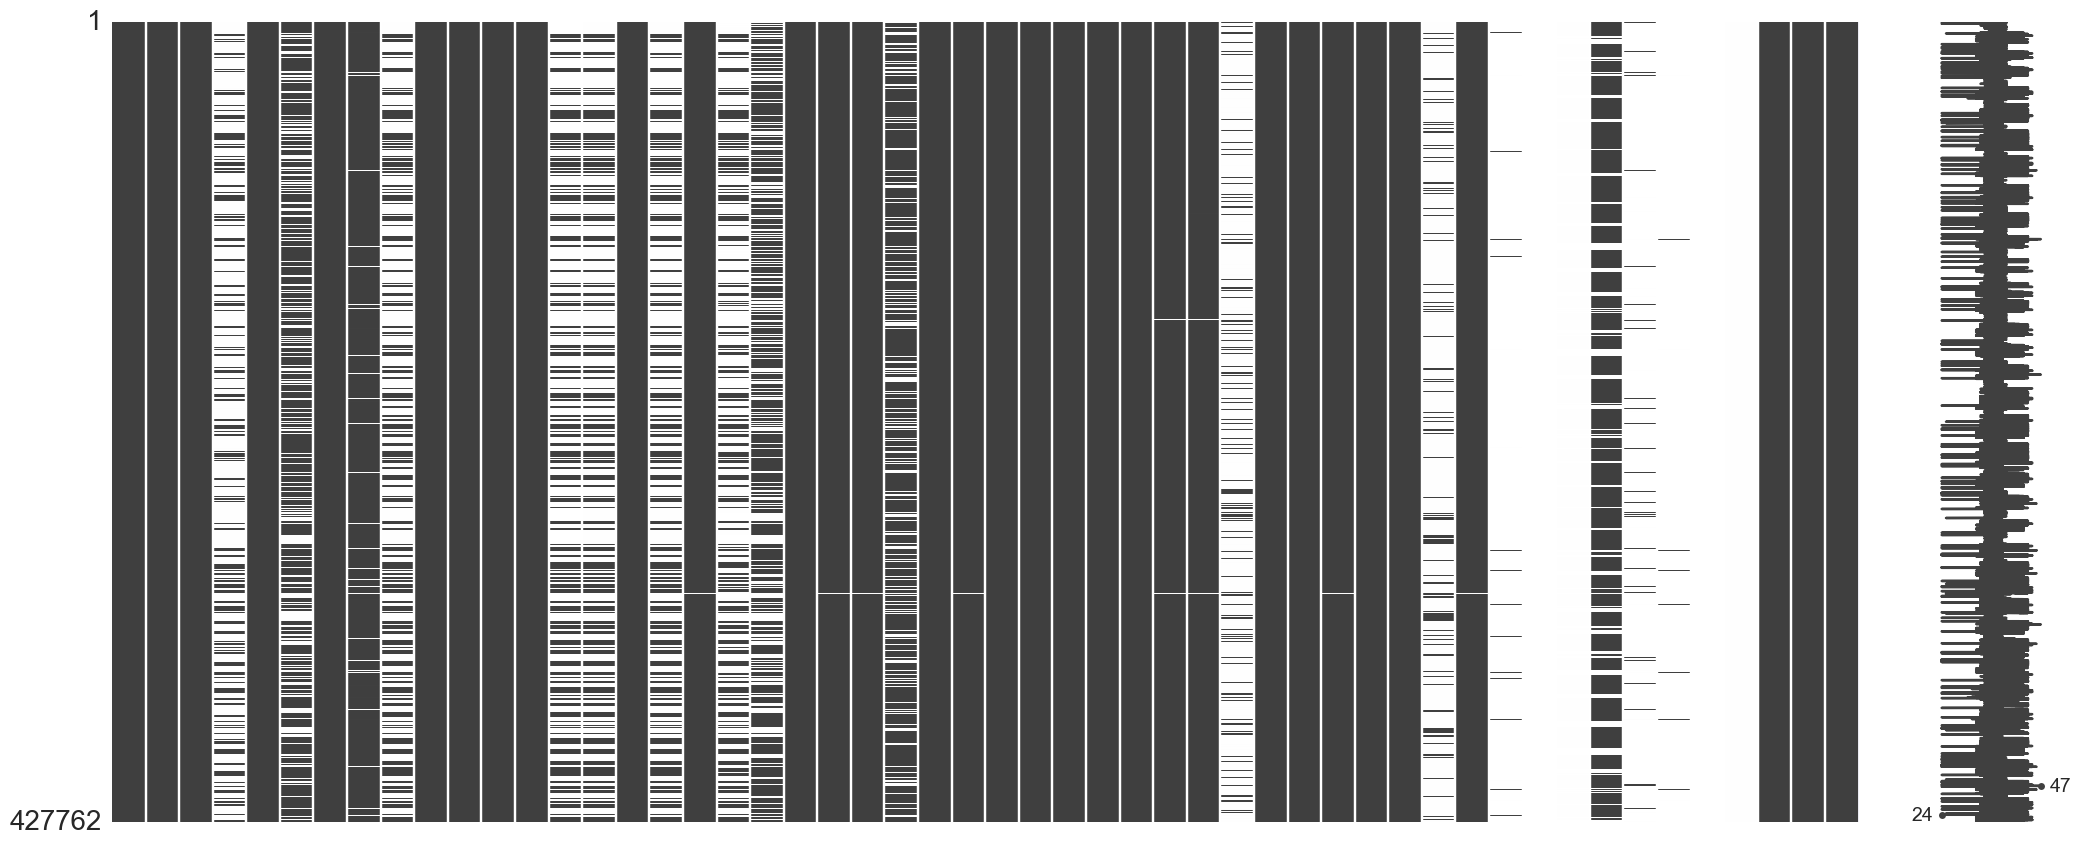

In [15]:
import missingno as msno

msno.matrix(hennepin)

**OK looks like some columns are barely populated. Let's remove them if they are less than 1% populated.**

In [16]:
def delete_near_null(df, cols, populated_threshold=0.01):
    """iterate through columns and remove columns with almost null columns"""
    for col in cols:
        non_null_rows = df[col].count()
        total_rows = len(df[col])
        populated_ratio = non_null_rows/total_rows
        if populated_ratio <= populated_threshold:
            del df[col]
    return df

In [17]:
# get the full list of columns to check
column_list = list(hennepin.columns.values)

# again I don't want to mess with the geometry column
column_list.remove('geometry')
# run the function
hennepin = delete_near_null(hennepin, column_list)

**What does our dataset look like now?**

In [18]:
hennepin.shape

(427762, 47)

# Filtering on Geodesic Features

**The dataset may have **`Point`** information. **

**These are sometimes there to help break up condos into individually owned units and tax each seperately. For ease of use and sanity I'm going to exclude them.**

**You can also have the following** `geom_types`
* Points / Multi-Points
* Lines / Multi-Lines
* Polygons / Multi-Polygons

In [19]:
# filter out points
hennepin = hennepin[hennepin['geometry'].geom_type != 'Point']

**Geospatial Joins and Searchs are computationally expensive. **

**If you can it helps to break up your data into pieces and process them iteratively. For this example we will just do Minneapolis, but you could write a loop to do each city at a time.**

In [20]:
# filter to minneapolis
mpls = hennepin[hennepin['CITY'] == 'MINNEAPOLIS']

In [21]:
mpls.shape

(129889, 47)

**Great we have 25% of the data we started with, that will help speed things along.**

# Joins / Merges

**Ok enough about taxes. Let's find properties that are adjacent to Lake Calhoun!**

**Read in the MetCount Lakes & Rivers Open Water Features shape file**

## [Review Lakes & Rivers Meta Data](./data/MetCouncil_Lakes_Rivers/metadata/metadata.html)

In [22]:
shp_file = './data/MetCouncil_Lakes_Rivers/LakesAndRivers.dbf'

water_df = gpd.read_file(shp_file)

In [23]:
water_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2349 entries, 0 to 2348
Data columns (total 8 columns):
ALT_NAME      210 non-null object
AREA_ACRES    2349 non-null float64
NAME_DNR      1588 non-null object
OWF_ID        2349 non-null object
SYSTEM        2349 non-null object
Shape_Area    2349 non-null float64
Shape_Leng    2349 non-null float64
geometry      2349 non-null object
dtypes: float64(3), object(5)
memory usage: 146.9+ KB


**Always a good habit to set the index**

In [24]:
water_df = water_df.set_index(['OWF_ID']).sort_index()

**Let's plot what we've got. This is a much smaller file than the tax parcels so it will be pretty fast.**

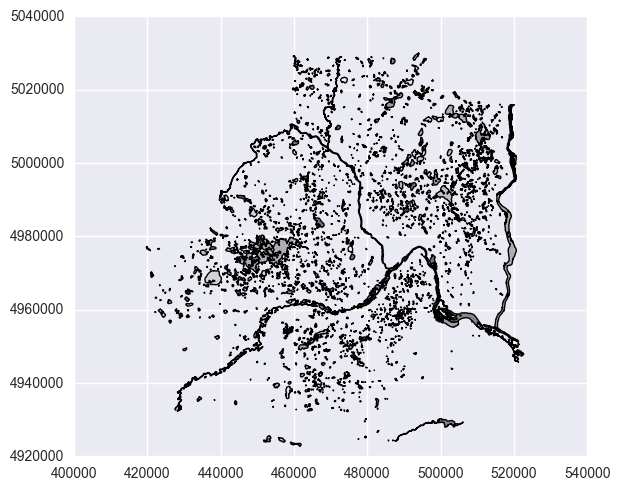

In [25]:
water_df.plot()
plt.show()

**Let's take a look at the fill rate of data.**

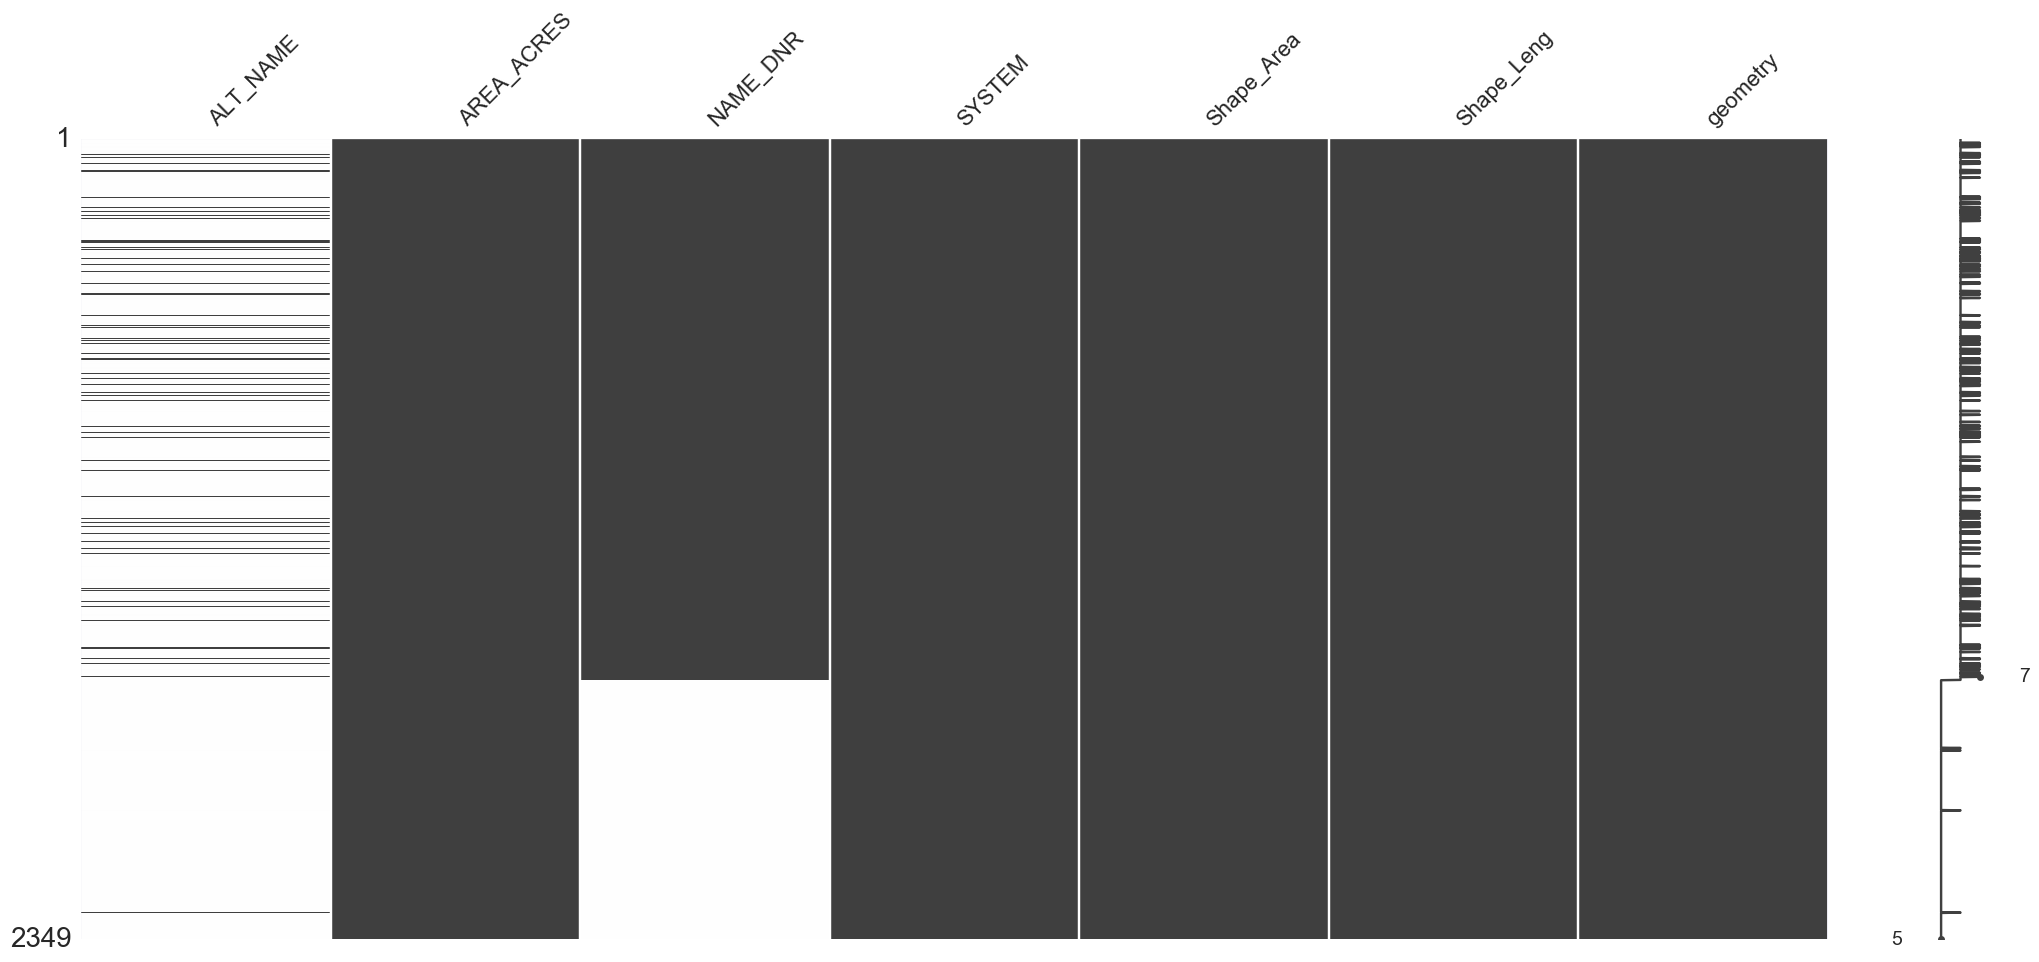

In [26]:
msno.matrix(water_df)

**Hmm lots of water features don't have names.**

**Don't forget the importance of context when doing your analysis. Talking with MetCouncil I found that these can be seasonal wetlands, retention ponds and other small water features.**

# Geospatial Transformations

**Remember when I said that geospatial calculations are expensive? **

**Well they still are. So again, split your work up and loop it if you need to do multiples.**

**Let's filter the data down to any lakes that are named 'Cedar'**

In [27]:
# cedar lake
cedar_lake = water_df[water_df['NAME_DNR'] == 'Cedar']
cedar_lake

,ALT_NAME,AREA_ACRES,NAME_DNR,SYSTEM,Shape_Area,Shape_Leng,geometry
OWF_ID,,,,,,,
27003900,None,168.41,Cedar,Lake,6.815421e+05,4803.870607,"POLYGON ((474663.9454 4979190.5593, 474684.879..."
70009100,None,793.48,Cedar,Lake,3.211136e+06,11307.426102,"POLYGON ((458834.4773 4938960.6654, 458842.693..."


**There are two lakes named Cedar in the dataset, which one?**

**We can look at a given lake's shape to see if it's what we are expecting.**

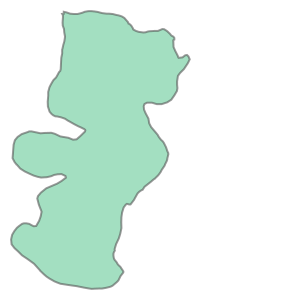

In [28]:
cedar_lake['geometry'].iloc[0]

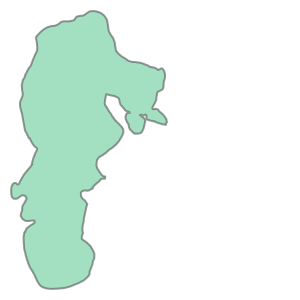

In [29]:
cedar_lake['geometry'].iloc[1]

**Let's filter our set to use the first lake. In reality you'd want to use the OWF_ID to ensure you are choosing the correct lake.**

In [30]:
cedar_lake = cedar_lake.iloc[[0]]

In [31]:
cedar_lake

,ALT_NAME,AREA_ACRES,NAME_DNR,SYSTEM,Shape_Area,Shape_Leng,geometry
OWF_ID,,,,,,,
27003900,None,168.41,Cedar,Lake,681542.105331,4803.870607,"POLYGON ((474663.9454 4979190.5593, 474684.879..."


**If we want to get properties next to Cedar Lake, you'd want to know that around many lakes in the city there is a public trail, so we need to expand our search beyond just what touches the lake.**

**We can accomplish this by 'buffering' or making the shape bigger in all directions. Let's do 100m for good measure.**

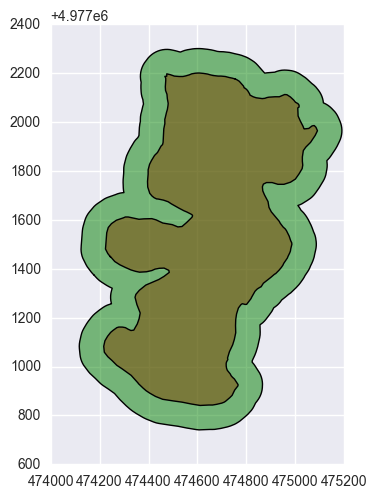

In [32]:
buffered_cedar_lake = cedar_lake.buffer(100)
ax = cedar_lake.plot(color='red')

buffered_cedar_lake.plot(ax=ax, color='green')
plt.show()

**For now we don't really care about any of the other attributes attached to this lake, we just care about its shape, so let's just get the **`Polygon`** to see where their are overlaps with properties.**

In [33]:
buffered_cedar_poly = buffered_cedar_lake.iloc[0]

**Now this next section is a bit complicated but is super fast. Using the **`rtree` **library you can quickly narrow down your search.**

**First step is to set the spatial index of the geospatial dataset you wish to search.**

In [34]:
spatial_index = mpls.sindex

**Next I want you to envision how complicated it would be to determine if a weird shape is overlapping another weird shape.**

**Wouldn't it be easier to just filter out the vast majority by seeing if a point is inside a rectangle?**

**Yes, yes it is.**

**A Bounding Box makes the smallest possible rectangle that completely encloses your polygon.**

**It is just a tuple of the minx, miny, maxx, maxy**

In [35]:
cedar_bb = buffered_cedar_poly.bounds
cedar_bb

(474116.7938611487, 4977740.731593291, 475191.1664816106, 4979300.6081)

**This next part isn't essential to understand the code because honestly its a mess, but rather to see that the bounding box is the smallest rectangle that the buffered lake fits in.**

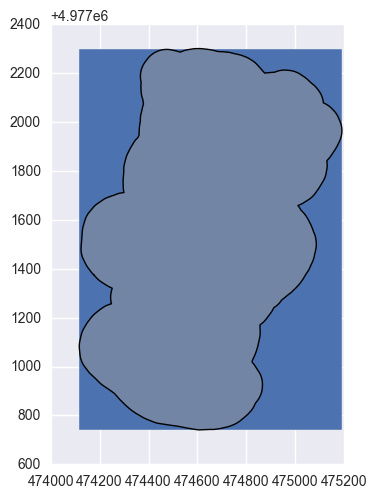

In [36]:
from shapely.geometry import box
from descartes import PolygonPatch

# convert the bounding box tuple into a polygon
cedar_box = box(cedar_bb[0], cedar_bb[1], cedar_bb[2], cedar_bb[3])

# plot the rectangle
fig = plt.figure() 
ax = fig.gca() 
ax.add_patch(PolygonPatch(cedar_box))

# ensure we aren't distorting the image
ax.axis('scaled')

# plot the buffered cedar lake polygon on top
buffered_cedar_lake.plot(ax=ax)
plt.show()

**Now we find all of the index values of the Minneapolis Tax Parcels that intersect with this bounding box.**

In [37]:
possible_matches_index = list(spatial_index.intersection(cedar_bb))

**Now we can select those parcels by their index values**

In [38]:
possible_matches = mpls.iloc[possible_matches_index]
possible_matches.shape

(457, 47)

**Now that was fairly quick and we've gone from 100k+ records down to a handful.**

**Next we look at those that actually touch that 100m buffer around Cedar Lake**

In [39]:
precise_matches = possible_matches[possible_matches.intersects(buffered_cedar_poly)]
precise_matches.shape

(208, 47)

**Also fairly fast and look we are left with 208 parcels that are within 100m of Cedar Lake!**

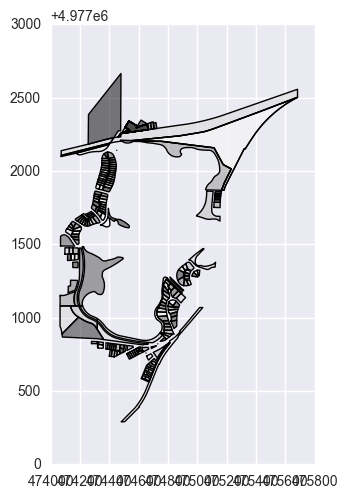

In [40]:
precise_matches.plot()
plt.show()

**Let's make a new dataframe that is only these matches. Let's add a column specifies these are close to Cedar Lake**


**NOTE: A better way would be to use HUC's (Hydrological Unit Code) so you don't run into the collision of multiple Cedar Lakes.**

In [41]:
# .copy() ensures we aren't mucking up the mpls dataframe since precise_matches is just a slice of it.
cedar_lake_parcels = precise_matches.copy()
cedar_lake_parcels['LAKE_NAME'] = 'Cedar Lake'

# Joining Tablular Data to Geospatial Data

**Now let's append some Lake Quality to these parcels surrounding Cedar Lake!**

## [Review Lake Quality Meta Data](./data/MN_PCA_Cedar_Lake/metadata.txt)

In [42]:
txt_file = './data/MN_PCA_Cedar_Lake/cedar_lake_qual.csv'
lake_qual = pd.read_csv(txt_file, parse_dates=['sampleDate', 'analysisDate'], na_values='(null)')

In [43]:
lake_qual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 20 columns):
analysisDate          29531 non-null datetime64[ns]
collectingOrg         29531 non-null object
comments              56 non-null object
county                29531 non-null object
gtlt                  1035 non-null object
parameter             29531 non-null object
result                29443 non-null object
resultUnit            29393 non-null object
sampleDate            29531 non-null datetime64[ns]
sampleTime            29531 non-null object
sampleDepthUnit       29531 non-null object
sampleFractionType    29531 non-null object
sampleLowerDepth      2525 non-null float64
sampleType            29531 non-null object
sampleUpperDepth      29523 non-null float64
stationId             29531 non-null object
stationName           29531 non-null object
statisticType         1 non-null object
testMethodId          29531 non-null object
testMethodName        29531 non-null object
dt

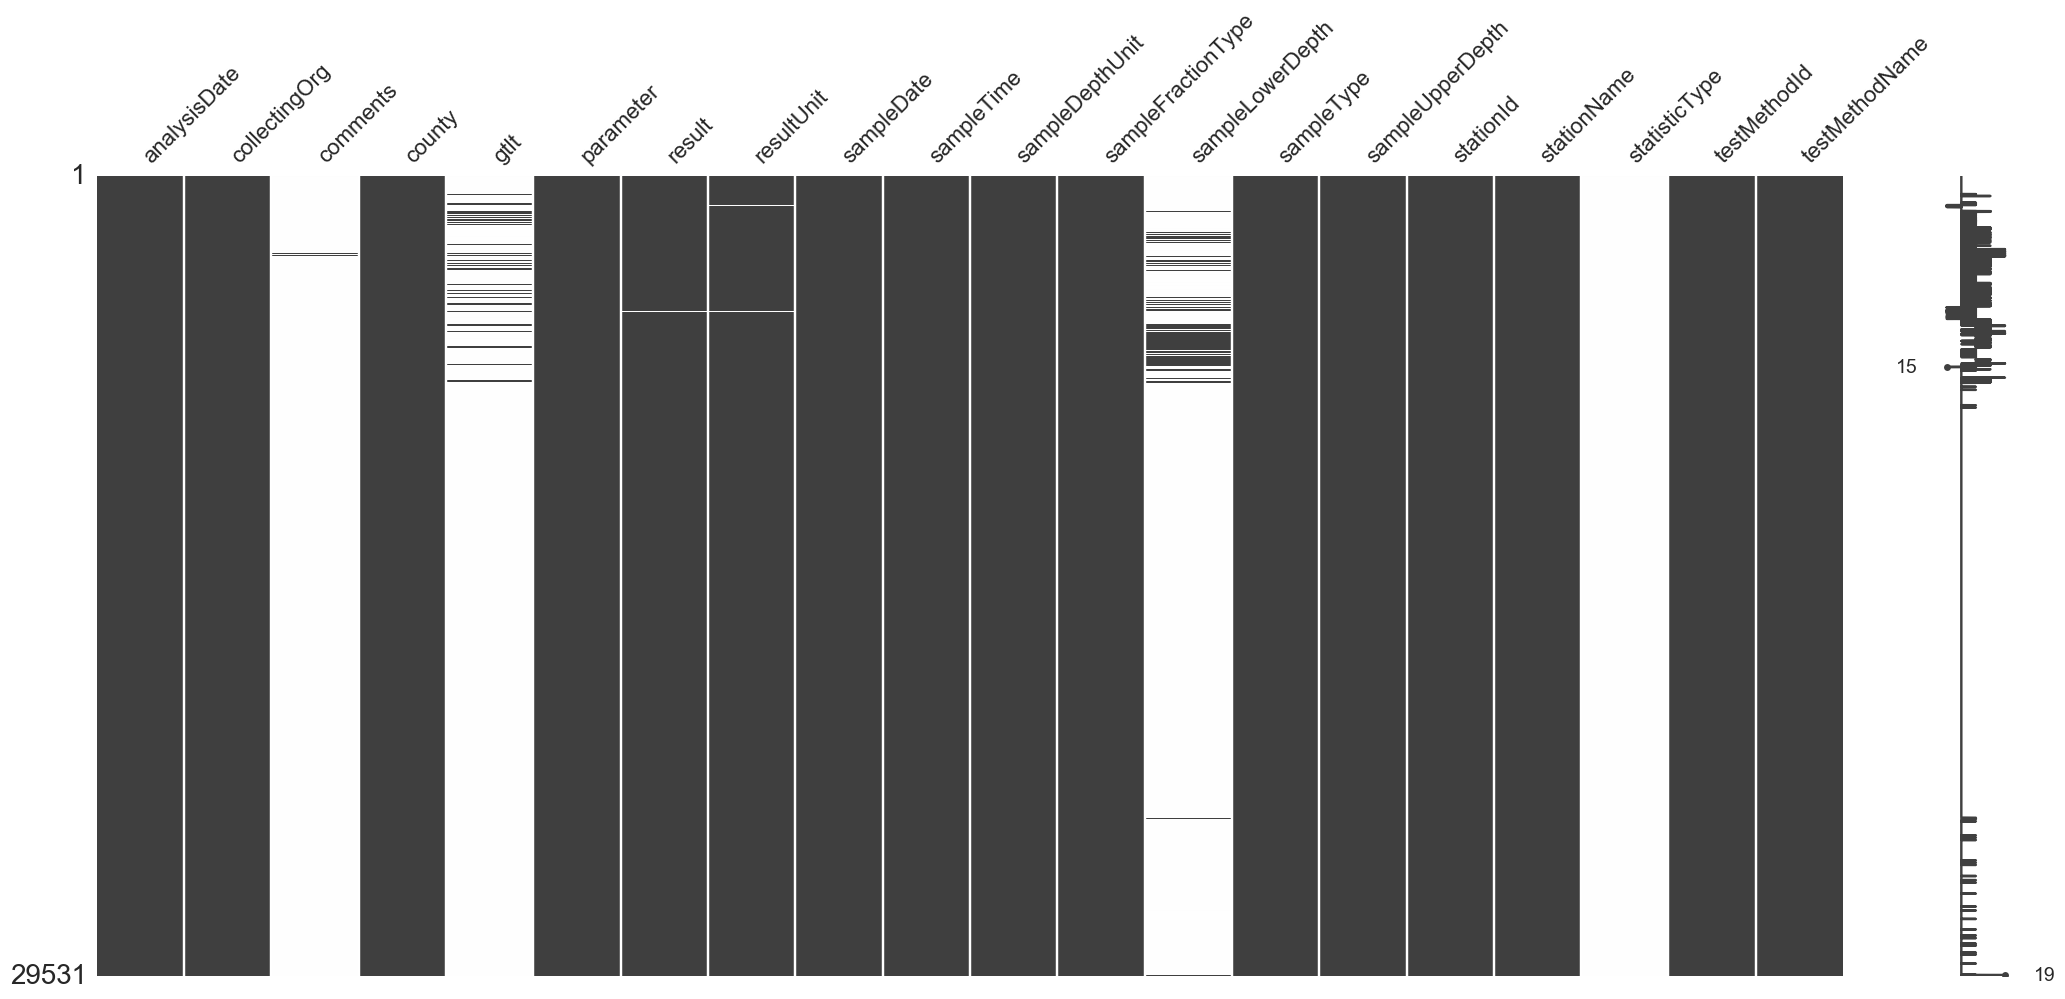

In [44]:
msno.matrix(lake_qual)

In [45]:
pandas_profiling.ProfileReport(lake_qual)

Number of variables,20
Number of observations,29531
Total Missing (%),19.4%
Total size in memory,4.5 MiB
Average record size in memory,160.0 B
Numeric,2
Categorical,12
Date,2
Text (Unique),0
Rejected,4
Distinct count,533


**Hmm for some reason result is being treated as a categorical variable.**

In [46]:
lake_qual['result'] = lake_qual['result'].astype('float')

ValueError: could not convert string to float: '3.MED ALGAE'

**Ahh, ok there are a few non-numeric values. Let's replace them with numbers.**

In [47]:
lake_qual['result'] = lake_qual['result'].astype('str').replace('3.MED ALGAE', '3').replace('3.FAIR', '3')
lake_qual['result'] = lake_qual['result'].astype('float')

**We only need 2014 data. Let's filter to that first**

In [48]:
lake_qual = lake_qual[lake_qual['sampleDate'].dt.year == 2014]
lake_qual.shape

(984, 20)

**Wait a second... 984 rows for one year??!**

In [49]:
lake_qual.head()

,analysisDate,collectingOrg,comments,county,gtlt,parameter,result,resultUnit,sampleDate,sampleTime,sampleDepthUnit,sampleFractionType,sampleLowerDepth,sampleType,sampleUpperDepth,stationId,stationName,statisticType,testMethodId,testMethodName
2803,1901-01-01,Minneapolis Chain of Lakes Project,NaN,Hennepin,NaN,Phosphorus as P,0.022,mg/L,2014-06-25,12:24:00,m,Total,NaN,Sample,5.0,27-0039-00-202,CEDAR,NaN,4500-P-E,Phosphorus in Water by Colorimetry- Ascorbic A...
2804,1901-01-01,Minneapolis Chain of Lakes Project,Lab qualifier: (<),Hennepin,<,Orthophosphate as P,0.003,mg/L,2014-06-25,12:24:00,m,Dissolved,NaN,Sample,5.0,27-0039-00-202,CEDAR,NaN,4500-P-E,Phosphorus in Water by Colorimetry- Ascorbic A...
2805,1901-01-01,Minneapolis Chain of Lakes Project,NaN,Hennepin,NaN,Phosphorus as P,0.058,mg/L,2014-06-25,12:21:00,m,Total,NaN,Sample,10.0,27-0039-00-202,CEDAR,NaN,4500-P-E,Phosphorus in Water by Colorimetry- Ascorbic A...
2806,1901-01-01,Minneapolis Chain of Lakes Project,NaN,Hennepin,NaN,Orthophosphate as P,0.024,mg/L,2014-06-25,12:21:00,m,Dissolved,NaN,Sample,10.0,27-0039-00-202,CEDAR,NaN,4500-P-E,Phosphorus in Water by Colorimetry- Ascorbic A...
2807,1901-01-01,Minneapolis Chain of Lakes Project,NaN,Hennepin,NaN,Phosphorus as P,0.111,mg/L,2014-06-25,12:20:00,m,Total,NaN,Sample,14.0,27-0039-00-202,CEDAR,NaN,4500-P-E,Phosphorus in Water by Colorimetry- Ascorbic A...


**Ahh, looks like data needs to be pivoted out.**

In [50]:
lake_qual_pivot = lake_qual.pivot_table(values='result', index='sampleDate', columns='parameter')
lake_qual_pivot.head()

parameter,"Alkalinity, total as CaCO3",Chloride,"Chlorophyll a, corrected for pheophytin","Depth, Secchi disk depth",Dissolved oxygen (DO),"Hardness, carbonate as CaCO3",Inorganic nitrogen (nitrate and nitrite) as N,Kjeldahl nitrogen as N,Nutrient-nitrogen as N,Orthophosphate as P,Pheophytin a,Phosphorus as P,Silica as SiO2,Specific conductance,Sulfate as SO4,"Temperature, water",pH
sampleDate,,,,,,,,,,,,,,,,,
2014-03-12,134.0,133.5,0.50,NaN,2.215333,164.0,0.577,1.37,0.792,0.03850,0.50,0.17100,1.28,750.846667,NaN,2.940000,7.206667
2014-05-05,122.0,162.0,5.47,1.41,7.363529,152.0,0.144,1.00,1.180,0.00950,5.10,0.05725,0.50,691.841176,8.8,6.543529,7.844706
2014-05-20,NaN,140.5,3.30,1.10,6.518125,NaN,NaN,NaN,0.964,0.00525,1.23,0.05425,NaN,711.987500,NaN,8.570000,7.993125
2014-06-11,NaN,141.5,2.40,3.85,3.059412,NaN,NaN,NaN,0.855,0.01500,0.50,0.05200,0.50,717.082353,NaN,10.798235,7.157647
2014-06-25,NaN,118.0,8.20,2.17,3.078235,NaN,NaN,NaN,0.657,0.01925,0.83,0.05475,NaN,696.905882,NaN,11.915294,7.592353


**Always good to look at the meta data and see if you should add anything to the set. In this case I want to put the lat/long**

In [51]:
lake_qual_pivot['latitude'] = 44.961482
lake_qual_pivot['longitude'] = -93.32013

**We will take the easy way out here and just create a column **`LAKE_NAME`** to join on. In reality you should use something like a 10digit HUC (Hydrological Unit Code) to insure that you don't have duplicate lake names ie (Cedar)**

In [52]:
lake_qual_pivot['LAKE_NAME'] = 'Cedar Lake'

In [53]:
result = cedar_lake_parcels.reset_index().merge(lake_qual_pivot, on='LAKE_NAME')
result.head()

,PIN,ACRES_DEED,ACRES_POLY,AG_PRESERV,BASEMENT,BLDG_NUM,BLOCK,CITY,CITY_USPS,COOLING,...,Orthophosphate as P,Pheophytin a,Phosphorus as P,Silica as SiO2,Specific conductance,Sulfate as SO4,"Temperature, water",pH,latitude,longitude
0,053-2902924330011,0.0,0.15,N,NaN,1944,003,MINNEAPOLIS,MINNEAPOLIS,NaN,...,0.03850,0.50,0.17100,1.28,750.846667,NaN,2.940000,7.206667,44.961482,-93.32013
1,053-2902924330011,0.0,0.15,N,NaN,1944,003,MINNEAPOLIS,MINNEAPOLIS,NaN,...,0.00950,5.10,0.05725,0.50,691.841176,8.8,6.543529,7.844706,44.961482,-93.32013
2,053-2902924330011,0.0,0.15,N,NaN,1944,003,MINNEAPOLIS,MINNEAPOLIS,NaN,...,0.00525,1.23,0.05425,NaN,711.987500,NaN,8.570000,7.993125,44.961482,-93.32013
3,053-2902924330011,0.0,0.15,N,NaN,1944,003,MINNEAPOLIS,MINNEAPOLIS,NaN,...,0.01500,0.50,0.05200,0.50,717.082353,NaN,10.798235,7.157647,44.961482,-93.32013
4,053-2902924330011,0.0,0.15,N,NaN,1944,003,MINNEAPOLIS,MINNEAPOLIS,NaN,...,0.01925,0.83,0.05475,NaN,696.905882,NaN,11.915294,7.592353,44.961482,-93.32013


**This inflated our data since there is an entry for roughly every week in 2014.**

**Lot of NaN columns, this is due to how each city collects and reports data around tax parcels**

In [54]:
result.shape

(2496, 68)

In [55]:
result = result.dropna(axis=1, how='all')

In [56]:
result.shape

(2496, 60)

# Geospatial Calculations

**Some lakes have multiple monitoring stations. You might want to use the data that is closest to the parcel.**

**Let's just do a simple calculation from the center of each parcel to the Lat/Long of the Monitoring Site**

In [57]:
result['Parcel_Centroid'] = result.centroid
result['Parcel_Centroid'].head()

0    POINT (474420.2918534343 4978995.538410055)
1    POINT (474420.2918534343 4978995.538410055)
2    POINT (474420.2918534343 4978995.538410055)
3    POINT (474420.2918534343 4978995.538410055)
4    POINT (474420.2918534343 4978995.538410055)
Name: Parcel_Centroid, dtype: object

**Weird, those don't look like any type of GPS coords I've seen.**

**GIS files use different 'datums' to set the origin of their coordinate systems. We will need to convert this.**

**This [GIS.stackexchange](http://gis.stackexchange.com/a/722) goes over the concept in detail. And yes... there is a Stack Overflow equivalent for GIS...**

In [58]:
# what is the starting projection
result.crs

{'init': 'epsg:26915'}

**Convert the projection to Normal Lat/Long**

In [59]:
result = result.to_crs({'init': 'epsg:4326'})

In [60]:
result['Parcel_Centroid'] = result.centroid
result['Parcel_Centroid'].head()

0    POINT (-93.324349184036 44.96393792859692)
1    POINT (-93.324349184036 44.96393792859692)
2    POINT (-93.324349184036 44.96393792859692)
3    POINT (-93.324349184036 44.96393792859692)
4    POINT (-93.324349184036 44.96393792859692)
Name: Parcel_Centroid, dtype: object

**So the problem here is that these centroids are still **`shapley.geometry.Point`** objects. We need to get them into tuples for **`geopy` ** to work with.

**Below is a **`lambda`** function they aren't really known for being super easy to read, but they are really handy. You can read the bottom one as: For each Point, get its x and y values and return them in a tuple.**

In [61]:
result['Parcel_Centroid'] = result['Parcel_Centroid'].apply(lambda p: tuple([p.y, p.x]))
result['Parcel_Centroid'].head()

0    (44.96393792859692, -93.324349184036)
1    (44.96393792859692, -93.324349184036)
2    (44.96393792859692, -93.324349184036)
3    (44.96393792859692, -93.324349184036)
4    (44.96393792859692, -93.324349184036)
Name: Parcel_Centroid, dtype: object

**Right now monitoring station coords are in into columns, need to convert that into a tuple.**

**The **`zip()`** function is similar to taking the left and right side of a jacket and 'zipping' them together. First thing on the left goes with the first thing on the right and on down the line.**

In [62]:
from shapely.geometry import Point

result['station_coords'] = tuple(zip(result['latitude'], result['longitude']))
# remove the old columns
drop_cols = ['latitude', 'longitude']
result = result.drop(drop_cols, axis=1)

result['station_coords'].head()

0    (44.961482, -93.32013)
1    (44.961482, -93.32013)
2    (44.961482, -93.32013)
3    (44.961482, -93.32013)
4    (44.961482, -93.32013)
Name: station_coords, dtype: object

**So now you have two Lat/Long Points. The key here is not to use euclidean distance when trying to find out how far part they are.**

**Recall that the further North or South you go the more the Longitude lines converge towards the pole. If you use euclidean distance your results will only be accurate at the equator!**

In [63]:
from geopy.distance import vincenty

def calc_dist(row):
    dist_to_station = vincenty(row['Parcel_Centroid'], row['station_coords']).km
    return dist_to_station

result['dist_to_station'] = result.apply(calc_dist, axis=1)

result['dist_to_station'].head()

0    0.430469
1    0.430469
2    0.430469
3    0.430469
4    0.430469
Name: dist_to_station, dtype: float64

**Now we just want the data were its the closest to the point.**

In [64]:
# group by the PIN key, which would be duplicated for each station and take the minimum
def get_min_rows(df, grpby, aggcol):
    min_values = df.groupby(grpby)[aggcol].transform(min)
    return df[df[aggcol] == min_values] 

min_parcels = get_min_rows(result, 'PIN', 'dist_to_station')
min_parcels.shape

(2496, 61)

# Writing Data Out

**GeoDataFrames can be exported to many different standard formats.**

In [65]:
# Shape files complain about certain data types
min_parcels['Parcel_Centroid'] = min_parcels['Parcel_Centroid'].astype('str')
min_parcels['station_coords'] = min_parcels['station_coords'].astype('str')

file_name = './data/results'

min_parcels.to_file(file_name)